# Cifar10 dataset classification with CNN
This notebook build a CNN model to classify the well-known dataset CIFAR10. 
This includes the following steps:
1. Load nessessary packages and libraries
2. Load and investigate dataset
3. Process dataset: Normalize the data and apply one-hot-code on train lables and test labels
4. Build CNN model
5. Fit the built model on training set and evaluate on testing set
6. Present the result

Referecens: 
1. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
2. https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529#:~:text=When%20we%20talk%20about%20computer,face%20recognition%2C%20image%20classification%20etc.&text=CNN%20also%20have%20learnable%20parameter,i.e%2C%20weights%2C%20biases%20etc.
3. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

## 1. Load nessessary packages and libraries

In [2]:
import sys
import numpy as np
import pandas as pd
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## 2. Load and investigate dataset

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

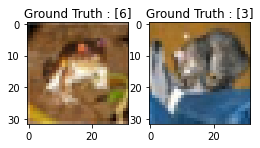

In [4]:
from keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print('Training data shape : ', train_data.shape, train_labels.shape)

print('Testing data shape : ', test_data.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_data[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_data[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

## 3. Process dataset: Normalize the data and apply one-hot-code on train lables and test labels

In [5]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


## 4. Build CNN model
This CNN model includes two blocks of stacking convolutional layers with small 3×3 filters followed by a max pooling layer. 
The number of filters in each block is increased with the depth of the network, i.e., 32 in the first block and 64 in the second block. Padding is used on the convolutional layers to ensure the height and width of the output feature is same as the inputs.

Dropout is also added to the model to randomly remove nodes in the model. 

In this case, we will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

In [6]:
def create_model_2VGG():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

## 5. Fit the built model on training set and evaluate on testing set

In [9]:
model = create_model_2VGG()
model.summary()
batch_size = 256
#epochs = 50
epochs = 50
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
_, acc = model.evaluate(test_data, test_labels_one_hot)
print('> %.3f' % (acc * 100.0))
print('This is the result trained on model with 2 VGG blocks')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

196/196 [==============================] - 114s 580ms/step - loss: 0.9052 - accuracy: 0.6815 - val_loss: 0.8697 - val_accuracy: 0.6914
Epoch 44/50
196/196 [==============================] - 114s 583ms/step - loss: 0.8849 - accuracy: 0.6874 - val_loss: 0.8654 - val_accuracy: 0.6962
Epoch 45/50
196/196 [==============================] - 114s 582ms/step - loss: 0.8783 - accuracy: 0.6896 - val_loss: 0.8571 - val_accuracy: 0.6973
Epoch 46/50
196/196 [==============================] - 113s 576ms/step - loss: 0.8704 - accuracy: 0.6890 - val_loss: 0.8450 - val_accuracy: 0.7011
Epoch 47/50
196/196 [==============================] - 113s 579ms/step - loss: 0.8598 - accuracy: 0.6949 - val_loss: 0.8558 - val_accuracy: 0.6994
Epoch 48/50
196/196 [==============================] - 115s 586ms/step - loss: 0.8537 - accuracy: 0.7023 - val_loss: 0.8515 - val_accuracy: 0.6984
Epoch 49/50
196/196 [==============================] - 113s 575ms/step - loss: 0.8442 - accuracy: 0.7029 - val_loss: 0.8416 - val_

## 6. Present the result

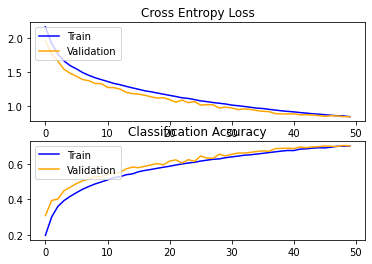

In [10]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend(['Train','Validation'], loc = 'upper left')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend(['Train','Validation'], loc = 'upper left')